# Example code of TrOCR

Colab 환경에서 TrOCR 모델을 사용해 손글씨를 인식해보는 예제입니다.

## 패키지 및 예제 데이터 다운로드하기

예제를 실행시키기 위해 python package들을 설치합니다. 예제로 사용할 이미지들도 다운로드 받습니다.

In [1]:
!wget https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt

--2024-12-30 05:52:45--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/requirements-colab.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123 [text/plain]
Saving to: ‘requirements-colab.txt’

requirements-colab. 100%[===================>]     123  --.-KB/s    in 0s      

2024-12-30 05:52:45 (14.2 MB/s) - ‘requirements-colab.txt’ saved [123/123]



In [2]:
!pip install -r requirements-colab.txt

  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached aiohappyeyeballs-2.4.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached frozenlist-1.5.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached multidict-6.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached propcache-0.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached yarl-1.18.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (69 kB)
  Using cached httpcore-1.0.7-py3-none-any.wh

In [3]:
# 예제 이미지 다운로드
!mkdir examples
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
!cd examples && wget https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/sentence.png

--2024-12-30 05:53:21--  https://github.com/mrsyee/dl_apps/raw/main/ocr/examples/Hello.png
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png [following]
--2024-12-30 05:53:21--  https://raw.githubusercontent.com/mrsyee/dl_apps/main/ocr/examples/Hello.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42139 (41K) [image/png]
Saving to: ‘Hello.png’

Hello.png           100%[===================>]  41.15K  --.-KB/s    in 0.001s  

2024-12-30 05:53:22 (46.9 MB/s) - ‘Hello.png’ saved [42139/42139]

--2024-12-30 05:53:22--  https://github.com/mrsyee/dl_apps

### 패키지 불러오기

In [4]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 예제 이미지 불러오기

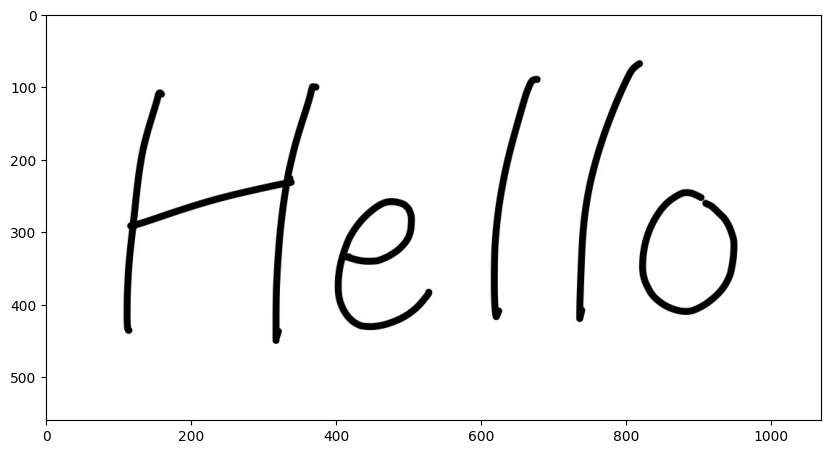

In [5]:
# Load image
image = Image.open("examples/Hello.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

### 사전 학습 모델 불러오기

huggingface의 transformers에 구현되어 있는 TrOCR 모델을 불러옵니다. transfomers 라이브러리에서 pre-train 된 TrOCR 모델을 제공합니다.

transfomers의 라이브러리에서 두 가지 class를 불러옵니다.

TrOCRProcessor: 모델에 입력할 데이터의 전처리와 출력된 모델 결과물의 후처리를 수행합니다.
VisionEncoderDecoderModel: 실제 모델이며 전처리된 입력을 받으면 결과물을 출력합니다.

In [6]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

### TrOCR 모델로 이미지에서 텍스트 추론하기

TrOCRProcessor와 VisionEncoderDecoderModel의 내부 함수를 이용해 전처리, 추론, 후처리를 수행하여 원하는 결과물을 얻습니다.

In [7]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

/home/haiqv/conda/envs/py310/lib/python3.10/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [8]:
text_from_image

'Hello'